In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

In [2]:
import random

#read the Excel file
import pandas as pd
directory_path = "~/Desktop/capstone/"
file_name = 'Sales 2016-2022 v6.xlsx'

In [ ]:
file_name = 'Sales 2016-2022 v6.xlsx'

In [3]:
import pandas as pd

file_path = directory_path + file_name
sales_data = pd.read_excel(file_path)

In [4]:
# Display the first few rows of the dataframe
sales_data.head()

,ZXG ID,Country,Industry,UT L30 - Segment,Family,Product name,PA part description,Rev type,20161,20162,...,20204,20211,20212,20213,20214,20221,20222,20223,20224,Grand Total
0,ZX001H1N,United States,1.0,Sterling B2B Integration,STER FILEGWA,B2B Integrator,B2B INTEGRATOR AO GLOBAL HIGH AVAILABILITY MB ...,Transaction,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2503116.9
1,ZX001H1N,United States,1.0,Sterling B2B Integration,STER FILEGWA,B2B Integrator,B2B INTEGRATOR AO GLOBAL HIGH AVAILABILITY MB ...,Subs & Supp,NaN,NaN,...,31322.7,31322.7,31322.7,31322.7,31322.7,31322.7,31322.7,31322.7,31322.7,407055.6
2,ZX001H1N,United States,1.0,Sterling B2B Integration,STER FILEGWA,B2B Integrator,B2B INTEGRATOR AO GLOBAL HIGH AVAILABILITY MB ...,Subs & Supp,NaN,NaN,...,125298.9,125298.9,125298.9,125298.9,125298.9,125298.9,125298.9,125298.9,125298.9,1628306.1
3,ZX001H1N,United States,1.0,Sterling B2B Integration,STER FILEGWA,B2B Integrator,STERLING B2B INTEGRATOR ENT ED PVU SUPT,Subs & Supp,2797.2,2797.2,...,22226.4,22226.4,22226.4,22307.4,22307.4,22307.4,22307.4,22307.4,22307.4,278391.6
4,ZX001H1N,United States,1.0,Sterling B2B Integration,STER FILEGWA,B2B Integrator,STERLING B2B INTEGRATOR ENT ED PVU SUB,Subs & Supp,11188.8,11188.8,...,88911.0,88911.0,88911.0,89237.7,89237.7,89237.7,89237.7,89237.7,89237.7,1113647.4


In [5]:
# Figure out where 'ZXG ID' needs to be fixed
from itertools import groupby
from operator import itemgetter

# Find the indices of the rows where 'ZXG ID' is blank
blank_indices = sales_data[sales_data['ZXG ID'].isna()].index.tolist()

# Function to convert list of indices to ranges
def indices_to_ranges(indices):
    """Convert a list of indices to ranges"""
    ranges = []
    for k, g in groupby(enumerate(indices), lambda i_x:i_x[0]-i_x[1]):
        consecutive_indices = list(map(itemgetter(1), g))
        if len(consecutive_indices) == 1:
            ranges.append(str(consecutive_indices[0]))
        else:
            ranges.append(f"{consecutive_indices[0]}-{consecutive_indices[-1]}")
    return ranges

# Convert indices to ranges
blank_ranges = indices_to_ranges(blank_indices)
blank_ranges

['5780-5983',
 '6934-7079',
 '14962-15053',
 '20712-20777',
 '20829-20894',
 '29617-29703',
 '32024-32037',
 '32457-32518',
 '34181-34244',
 '34336-34351',
 '35441-35469',
 '38015-38023',
 '38828-38863',
 '41792-41806',
 '45231-45242',
 '46720-46731',
 '47870-47892',
 '48807',
 '48845-48848',
 '49455-49460',
 '49750-49753',
 '50679-50682',
 '51716-51723',
 '51988-51989',
 '52631-52632',
 '53124-53131',
 '53478-53483',
 '53926-53927',
 '54800-54802',
 '54981-54986',
 '55271-55273',
 '55825-55833',
 '56040-56041',
 '56220-56234',
 '56259-56264',
 '57101-57106',
 '57619-57622',
 '57712-57718',
 '57978-57980',
 '58080-58084',
 '58099-58102',
 '58465-58468',
 '58534-58535',
 '59603-59612',
 '59629-59662',
 '59679-59682',
 '59796-59804',
 '59837-59841',
 '59861-59863',
 '59921-59926',
 '60635-60680',
 '60829-60843',
 '62275-62294',
 '62346-62404',
 '64314-64329',
 '65835-65845',
 '66261-66275',
 '68672-68682',
 '68894-68913',
 '69538-69546',
 '70467-70472',
 '70596-70624',
 '70767-70779',
 '

In [6]:
# Find all the rows where 'Country' is blank
blank_rows_country = sales_data[sales_data['Country'].isna()].index.tolist()

# Apply function to get ranges
blank_ranges_country = indices_to_ranges(blank_rows_country)
blank_ranges_country

['6934-7079', '62275-62294']

In [7]:
# Replace the blanks in the specified ranges with the specified values
sales_data.loc[6934:7079, 'Country'] = sales_data.loc[6934:7079, 'Country'].fillna('Moe_Country')
sales_data.loc[62275:62294, 'Country'] = sales_data.loc[62275:62294, 'Country'].fillna('Wanchi_Country')

# Check if the replacements were successful
sales_data.loc[6934:7079]['Country'].unique(), sales_data.loc[62275:62294]['Country'].unique()

(array(['Moe_Country'], dtype=object), array(['Wanchi_Country'], dtype=object))

In [8]:
# Initialize a company counter
company_counter = 1

# Iterate over the blank ranges in the 'ZXG ID' column
for start, end in [(int(r.split('-')[0]), int(r.split('-')[1])) if '-' in r else (int(r), int(r)) for r in blank_ranges]:
    # Get the unique countries in the current range
    unique_countries = sales_data.loc[start:end, 'Country'].unique()

    # Iterate over the unique countries
    for country in unique_countries:
        # Get the indices for the current country within the current range
        indices = sales_data.loc[start:end][sales_data['Country'] == country].index

        # Assign the company name to the 'ZXG ID' column for the current indices
        sales_data.loc[indices, 'ZXG ID'] = f'MW{company_counter}'

        # Increment the company counter
        company_counter += 1

# Check the first few rows of the modified dataset
sales_data.loc[[5780,5983,6934,7079,14962,15053,59837,59838,59839,59840,59841], :]

/var/folders/kt/n_01c2t91fz15bhz621qz2640000gn/T/ipykernel_95569/2893228086.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  indices = sales_data.loc[start:end][sales_data['Country'] == country].index
/var/folders/kt/n_01c2t91fz15bhz621qz2640000gn/T/ipykernel_95569/2893228086.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  indices = sales_data.loc[start:end][sales_data['Country'] == country].index
/var/folders/kt/n_01c2t91fz15bhz621qz2640000gn/T/ipykernel_95569/2893228086.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  indices = sales_data.loc[start:end][sales_data['Country'] == country].index
/var/folders/kt/n_01c2t91fz15bhz621qz2640000gn/T/ipykernel_95569/2893228086.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  indices = sales_data.loc[start:end][sales_data['Country'] == country].index
/var/folders/kt/n_01c2t91fz15bhz621qz2640000gn/T/ipy

,ZXG ID,Country,Industry,UT L30 - Segment,Family,Product name,PA part description,Rev type,20161,20162,...,20204,20211,20212,20213,20214,20221,20222,20223,20224,Grand Total
5780,MW1,United States,NaN,Sterling Transformation Extender,STER TRANSX,WebSphere Transform Ext Com Svr,WEBSPHERE TRANSFORM EXTEND WITH COMMAND PVU INSTL,Transaction,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1395744.3
5983,MW1,United States,NaN,Sterling Partner Engagement Manager,PEM,Sterling Prtnr Engage Mgr Software,IBM STERL PRTNR ENGAGEMENT MGR STD CTNR ED RVU...,Transaction,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,23102.1,NaN,NaN,NaN,23102.1
6934,MW2,Moe_Country,NaN,Sterling Transformation Extender,STER TRANSX,WS Transfrm Ext Pk Design Studio,WEBSPHERE TRANSFORM EXTENDER DESIGN STU AUTHUS...,Subs & Supp,NaN,-14175.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
7079,MW2,Moe_Country,NaN,Sterling Partner Engagement Manager,PEM,Sterling Prtnr Engage Mgr Software,IBM STERLING PARTNER ENG MNGR STD ED PER ENTIT...,Transaction,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
14962,MW3,Germany,NaN,Sterling Managed File Transfer,STER MFT,MFT Connect:Direct,STERLING C D STD ED NON-PROD ENV SMLT SESSN SUPT,Subs & Supp,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,115.2
15053,MW3,Germany,NaN,Sterling Partner Engagement Manager,PEM,Sterling Prtnr Engage Mgr Software,IBM STERL PRTNR ENGAGEMENT MGR STD CTNR ED RVU...,Transaction,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-122.4,NaN,NaN,NaN,-122.4
59837,MW48,Denmark,NaN,Sterling Managed File Transfer,STER MFT,MFT Connect:Direct,STERLING C D PREM ED PVU SUPT,Subs & Supp,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-32.4
59838,MW49,Czech Republic,NaN,Sterling Managed File Transfer,STER MFT,MFT Connect:Direct,STERLING C D STD ED NON-PROD ENV SMLT SESSN SUPT,Subs & Supp,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-10.8
59839,MW49,Czech Republic,NaN,Sterling Managed File Transfer,STER MFT,MFT Connect:Direct,STERLING C D STD ED SMLT SESSN SUPT,Subs & Supp,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-21.6
59840,MW50,Belarus,NaN,Sterling Managed File Transfer,STER MFT,MFT Connect:Direct,STERLING C D STD ED NON-PROD ENV SMLT SESSN SUPT,Subs & Supp,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-16.2


In [9]:
# Convert 'Industry' to string type
sales_data['Industry'] = sales_data['Industry'].astype(str)

# Replace blank values with '99'
sales_data['Industry'].replace(['nan', ''], '99', inplace=True)

In [10]:
# Convert column names to strings
sales_data.columns = sales_data.columns.astype(str)
sales_data

,ZXG ID,Country,Industry,UT L30 - Segment,Family,Product name,PA part description,Rev type,20161,20162,...,20204,20211,20212,20213,20214,20221,20222,20223,20224,Grand Total
0,ZX001H1N,United States,1.0,Sterling B2B Integration,STER FILEGWA,B2B Integrator,B2B INTEGRATOR AO GLOBAL HIGH AVAILABILITY MB ...,Transaction,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2503116.9
1,ZX001H1N,United States,1.0,Sterling B2B Integration,STER FILEGWA,B2B Integrator,B2B INTEGRATOR AO GLOBAL HIGH AVAILABILITY MB ...,Subs & Supp,NaN,NaN,...,31322.7,31322.7,31322.7,31322.7,31322.7,31322.7,31322.7,31322.7,31322.7,407055.6
2,ZX001H1N,United States,1.0,Sterling B2B Integration,STER FILEGWA,B2B Integrator,B2B INTEGRATOR AO GLOBAL HIGH AVAILABILITY MB ...,Subs & Supp,NaN,NaN,...,125298.9,125298.9,125298.9,125298.9,125298.9,125298.9,125298.9,125298.9,125298.9,1628306.1
3,ZX001H1N,United States,1.0,Sterling B2B Integration,STER FILEGWA,B2B Integrator,STERLING B2B INTEGRATOR ENT ED PVU SUPT,Subs & Supp,2797.2,2797.2,...,22226.4,22226.4,22226.4,22307.4,22307.4,22307.4,22307.4,22307.4,22307.4,278391.6
4,ZX001H1N,United States,1.0,Sterling B2B Integration,STER FILEGWA,B2B Integrator,STERLING B2B INTEGRATOR ENT ED PVU SUB,Subs & Supp,11188.8,11188.8,...,88911.0,88911.0,88911.0,89237.7,89237.7,89237.7,89237.7,89237.7,89237.7,1113647.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89534,MW113,Switzerland,99,Sterling B2B Integration,STER FILEGWA,Gentran,Gentran,B2B SW,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-90.0
89535,MW113,Switzerland,99,Sterling Partner Engagement Manager,PEM,Sterling Prtnr Engage Mgr Software,Sterling Prtnr Engage Mgr Software,B2B SW,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,587.7,NaN,NaN,NaN,587.7
89536,MW113,Switzerland,99,Sterling Managed File Transfer,STER MFT,MFT Secure Proxy,MFT Secure Proxy,B2B SW,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-630000.0,-630000.0
89537,MW113,Switzerland,99,Sterling Managed File Transfer,STER MFT,MFT Connect:Direct,MFT Connect:Direct,B2B SW,175.5,175.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-810000.0,-807514.2


In [11]:
# delete all rows with in col_revenue has negative value
col_revenue = ['20161','20162','20163','20164','20171','20172','20173','20174','20181','20182','20183','20184','20191','20192','20193','20194','20201','20202','20203','20204','20211','20212','20213','20214','20221','20222','20223','20224', 'Grand Total']

for col in col_revenue:
     sales_data[col].mask(sales_data[col] < 0.0 , inplace=True)

In [12]:
# Check column type
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89539 entries, 0 to 89538
Data columns (total 37 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ZXG ID               89539 non-null  object 
 1   Country              89539 non-null  object 
 2   Industry             89539 non-null  object 
 3   UT L30 - Segment     89539 non-null  object 
 4   Family               89539 non-null  object 
 5   Product name         89539 non-null  object 
 6   PA part description  87103 non-null  object 
 7   Rev type             89539 non-null  object 
 8   20161                44179 non-null  float64
 9   20162                44916 non-null  float64
 10  20163                43992 non-null  float64
 11  20164                44826 non-null  float64
 12  20171                43242 non-null  float64
 13  20172                43332 non-null  float64
 14  20173                43062 non-null  float64
 15  20174                43885 non-null 

In [13]:
sales_data

,ZXG ID,Country,Industry,UT L30 - Segment,Family,Product name,PA part description,Rev type,20161,20162,...,20204,20211,20212,20213,20214,20221,20222,20223,20224,Grand Total
0,ZX001H1N,United States,1.0,Sterling B2B Integration,STER FILEGWA,B2B Integrator,B2B INTEGRATOR AO GLOBAL HIGH AVAILABILITY MB ...,Transaction,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2503116.9
1,ZX001H1N,United States,1.0,Sterling B2B Integration,STER FILEGWA,B2B Integrator,B2B INTEGRATOR AO GLOBAL HIGH AVAILABILITY MB ...,Subs & Supp,NaN,NaN,...,31322.7,31322.7,31322.7,31322.7,31322.7,31322.7,31322.7,31322.7,31322.7,407055.6
2,ZX001H1N,United States,1.0,Sterling B2B Integration,STER FILEGWA,B2B Integrator,B2B INTEGRATOR AO GLOBAL HIGH AVAILABILITY MB ...,Subs & Supp,NaN,NaN,...,125298.9,125298.9,125298.9,125298.9,125298.9,125298.9,125298.9,125298.9,125298.9,1628306.1
3,ZX001H1N,United States,1.0,Sterling B2B Integration,STER FILEGWA,B2B Integrator,STERLING B2B INTEGRATOR ENT ED PVU SUPT,Subs & Supp,2797.2,2797.2,...,22226.4,22226.4,22226.4,22307.4,22307.4,22307.4,22307.4,22307.4,22307.4,278391.6
4,ZX001H1N,United States,1.0,Sterling B2B Integration,STER FILEGWA,B2B Integrator,STERLING B2B INTEGRATOR ENT ED PVU SUB,Subs & Supp,11188.8,11188.8,...,88911.0,88911.0,88911.0,89237.7,89237.7,89237.7,89237.7,89237.7,89237.7,1113647.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89534,MW113,Switzerland,99,Sterling B2B Integration,STER FILEGWA,Gentran,Gentran,B2B SW,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89535,MW113,Switzerland,99,Sterling Partner Engagement Manager,PEM,Sterling Prtnr Engage Mgr Software,Sterling Prtnr Engage Mgr Software,B2B SW,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,587.7,NaN,NaN,NaN,587.7
89536,MW113,Switzerland,99,Sterling Managed File Transfer,STER MFT,MFT Secure Proxy,MFT Secure Proxy,B2B SW,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89537,MW113,Switzerland,99,Sterling Managed File Transfer,STER MFT,MFT Connect:Direct,MFT Connect:Direct,B2B SW,175.5,175.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# Verify if there is still negative value in the dataset
for col in col_revenue:
     # Replace values of Given column by using np.where() function
     print(len(sales_data[sales_data[col] < 0.0]))
     # print(sales_data)

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [15]:
# Remove the bias by apply the MinMaxScaler to all revenue related columns
# Import the necessary library
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Normalize the numerical features
for col in col_revenue:
    sales_data[col] = scaler.fit_transform(sales_data[[col]])
    #sales_data_encoded[col] = scaler.fit_transform(sales_data_encoded[[col]])

print(sales_data)

         ZXG ID        Country Industry                     UT L30 - Segment  \
0      ZX001H1N  United States      1.0             Sterling B2B Integration   
1      ZX001H1N  United States      1.0             Sterling B2B Integration   
2      ZX001H1N  United States      1.0             Sterling B2B Integration   
3      ZX001H1N  United States      1.0             Sterling B2B Integration   
4      ZX001H1N  United States      1.0             Sterling B2B Integration   
...         ...            ...      ...                                  ...   
89534     MW113    Switzerland       99             Sterling B2B Integration   
89535     MW113    Switzerland       99  Sterling Partner Engagement Manager   
89536     MW113    Switzerland       99       Sterling Managed File Transfer   
89537     MW113    Switzerland       99       Sterling Managed File Transfer   
89538     MW113    Switzerland       99       Sterling Managed File Transfer   

             Family                    

In [16]:
# Columns to replace NaN values
cols_to_replace = ['20161','20162','20163','20164','20171','20172','20173','20174','20181','20182','20183','20184','20191','20192','20193','20194','20201','20202','20203','20204','20211','20212','20213','20214','20221','20222','20223','20224', 'Grand Total']

# Replace NaN values with 0 in the specified columns
sales_data[cols_to_replace] = sales_data[cols_to_replace].fillna(0)

In [17]:
sales_data_modified = sales_data

In [18]:
sales_data_modified

,ZXG ID,Country,Industry,UT L30 - Segment,Family,Product name,PA part description,Rev type,20161,20162,...,20204,20211,20212,20213,20214,20221,20222,20223,20224,Grand Total
0,ZX001H1N,United States,1.0,Sterling B2B Integration,STER FILEGWA,B2B Integrator,B2B INTEGRATOR AO GLOBAL HIGH AVAILABILITY MB ...,Transaction,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.125690
1,ZX001H1N,United States,1.0,Sterling B2B Integration,STER FILEGWA,B2B Integrator,B2B INTEGRATOR AO GLOBAL HIGH AVAILABILITY MB ...,Subs & Supp,0.000000,0.000000,...,0.010344,0.027422,0.016568,0.016622,0.006559,0.010693,0.010745,0.003681,0.007002,0.020440
2,ZX001H1N,United States,1.0,Sterling B2B Integration,STER FILEGWA,B2B Integrator,B2B INTEGRATOR AO GLOBAL HIGH AVAILABILITY MB ...,Subs & Supp,0.000000,0.000000,...,0.041378,0.109694,0.066278,0.066492,0.026237,0.042774,0.042984,0.014724,0.028012,0.081763
3,ZX001H1N,United States,1.0,Sterling B2B Integration,STER FILEGWA,B2B Integrator,STERLING B2B INTEGRATOR ENT ED PVU SUPT,Subs & Supp,0.000903,0.000538,...,0.007340,0.019458,0.011757,0.011838,0.004671,0.007615,0.007653,0.002621,0.004987,0.013979
4,ZX001H1N,United States,1.0,Sterling B2B Integration,STER FILEGWA,B2B Integrator,STERLING B2B INTEGRATOR ENT ED PVU SUB,Subs & Supp,0.003611,0.002153,...,0.029361,0.077838,0.047030,0.047356,0.018686,0.030464,0.030613,0.010486,0.019950,0.055920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89534,MW113,Switzerland,99,Sterling B2B Integration,STER FILEGWA,Gentran,Gentran,B2B SW,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
89535,MW113,Switzerland,99,Sterling Partner Engagement Manager,PEM,Sterling Prtnr Engage Mgr Software,Sterling Prtnr Engage Mgr Software,B2B SW,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000201,0.000000,0.000000,0.000000,0.000030
89536,MW113,Switzerland,99,Sterling Managed File Transfer,STER MFT,MFT Secure Proxy,MFT Secure Proxy,B2B SW,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
89537,MW113,Switzerland,99,Sterling Managed File Transfer,STER MFT,MFT Connect:Direct,MFT Connect:Direct,B2B SW,0.000057,0.000034,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [19]:
sales_data_modified = sales_data_modified.rename(columns={"ZXG ID": "ZXGID"})

In [20]:
# filter out Data Exchange Service Offering (Expert Labs Only)
sales_data_modified = sales_data_modified[sales_data_modified["UT L30 - Segment"] != "Data Exchange Service Offering (Expert Labs Only)"]

In [21]:
# remove rows where PA part description is blank
sales_data_modified = sales_data_modified.dropna(subset = ['PA part description'])

In [22]:
# Using apply() method to combine multiple columns of text
sales_data_modified["CombinedProductName"] = sales_data_modified[['UT L30 - Segment', 'Family', 'Product name']].apply(lambda x:"-".join(x.astype(str)), axis=1)
print(sales_data_modified)

          ZXGID        Country Industry                     UT L30 - Segment  \
0      ZX001H1N  United States      1.0             Sterling B2B Integration   
1      ZX001H1N  United States      1.0             Sterling B2B Integration   
2      ZX001H1N  United States      1.0             Sterling B2B Integration   
3      ZX001H1N  United States      1.0             Sterling B2B Integration   
4      ZX001H1N  United States      1.0             Sterling B2B Integration   
...         ...            ...      ...                                  ...   
89534     MW113    Switzerland       99             Sterling B2B Integration   
89535     MW113    Switzerland       99  Sterling Partner Engagement Manager   
89536     MW113    Switzerland       99       Sterling Managed File Transfer   
89537     MW113    Switzerland       99       Sterling Managed File Transfer   
89538     MW113    Switzerland       99       Sterling Managed File Transfer   

             Family                    

In [23]:
# Encode ZXGID, CombinedProductName
from sklearn.preprocessing import LabelEncoder

# Make a copy of the data
sales_data_encoded_product = sales_data_modified.copy()
encode_list = ["ZXGID", "CombinedProductName"]

# Apply label encoding to each column
label_encoder = LabelEncoder()
for col in encode_list:
    sales_data_encoded_product[col] = label_encoder.fit_transform(sales_data_encoded_product[col].astype(str))
sales_data_encoded_product["ZXGID"]=pd.to_numeric(sales_data_encoded_product["ZXGID"])

print(sales_data_encoded_product.head())
#print(sales_data_encoded_product)


   ZXGID        Country Industry          UT L30 - Segment        Family  \
0   8656  United States      1.0  Sterling B2B Integration  STER FILEGWA   
1   8656  United States      1.0  Sterling B2B Integration  STER FILEGWA   
2   8656  United States      1.0  Sterling B2B Integration  STER FILEGWA   
3   8656  United States      1.0  Sterling B2B Integration  STER FILEGWA   
4   8656  United States      1.0  Sterling B2B Integration  STER FILEGWA   

     Product name                                PA part description  \
0  B2B Integrator  B2B INTEGRATOR AO GLOBAL HIGH AVAILABILITY MB ...   
1  B2B Integrator  B2B INTEGRATOR AO GLOBAL HIGH AVAILABILITY MB ...   
2  B2B Integrator  B2B INTEGRATOR AO GLOBAL HIGH AVAILABILITY MB ...   
3  B2B Integrator            STERLING B2B INTEGRATOR ENT ED PVU SUPT   
4  B2B Integrator             STERLING B2B INTEGRATOR ENT ED PVU SUB   

      Rev type     20161     20162  ...     20211     20212     20213  \
0  Transaction  0.000000  0.000000  .

In [24]:
# Calculate Grand Revenue from 20161 - 2021[4train] and 20221 - 20224[test]
# Create List of columns
col_list = ['20161','20162','20163','20164','20171','20172','20173','20174','20181','20182','20183','20184','20191','20192','20193','20194','20201','20202','20203','20204','20211','20212', '20213','20214']
col_list1 = ['20221','20222','20223','20224']
# Sum specific columns
sales_data_encoded_product['Sum_train'] = sales_data_encoded_product[col_list].sum(axis=1)
sales_data_encoded_product['Sum_test'] = sales_data_encoded_product[col_list1].sum(axis=1)
print(sales_data_encoded_product)

       ZXGID        Country Industry                     UT L30 - Segment  \
0       8656  United States      1.0             Sterling B2B Integration   
1       8656  United States      1.0             Sterling B2B Integration   
2       8656  United States      1.0             Sterling B2B Integration   
3       8656  United States      1.0             Sterling B2B Integration   
4       8656  United States      1.0             Sterling B2B Integration   
...      ...            ...      ...                                  ...   
89534     16    Switzerland       99             Sterling B2B Integration   
89535     16    Switzerland       99  Sterling Partner Engagement Manager   
89536     16    Switzerland       99       Sterling Managed File Transfer   
89537     16    Switzerland       99       Sterling Managed File Transfer   
89538     16    Switzerland       99       Sterling Managed File Transfer   

             Family                        Product name  \
0      STER FILE

In [25]:
# output_file_path = "sales_data_encoded_product.csv"
# sales_data_encoded_product.to_csv(output_file_path, index=False)
#
# sales_data_encoded_product

In [26]:
# Find out which industry has highest grand total revenue.
sales_data_encoded_product_industry = sales_data_encoded_product.groupby('Industry', sort=False).agg({'Grand Total':'sum'}).sort_values('Grand Total', ascending = False)
sales_data_encoded_product_industry.head(10)

,Grand Total
Industry,
1.0,71.898916
3.0,24.007152
4.0,22.402198
5.0,21.525118
7.0,19.820488
11.0,14.510283
8.0,12.442671
6.0,12.149500
15.0,10.702867


In [27]:
### From here, all the analysis will only be industry code 1.
sales_data_encoded_product_industry_one = sales_data_encoded_product.loc[lambda x: x['Industry'] == '1.0']
sales_data_encoded_product_industry_one

,ZXGID,Country,Industry,UT L30 - Segment,Family,Product name,PA part description,Rev type,20161,20162,...,20213,20214,20221,20222,20223,20224,Grand Total,CombinedProductName,Sum_train,Sum_test
0,8656,United States,1.0,Sterling B2B Integration,STER FILEGWA,B2B Integrator,B2B INTEGRATOR AO GLOBAL HIGH AVAILABILITY MB ...,Transaction,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.125690,4,0.968506,0.000000
1,8656,United States,1.0,Sterling B2B Integration,STER FILEGWA,B2B Integrator,B2B INTEGRATOR AO GLOBAL HIGH AVAILABILITY MB ...,Subs & Supp,0.000000,0.000000,...,0.016622,0.006559,0.010693,0.010745,0.003681,0.007002,0.020440,4,0.138631,0.032121
2,8656,United States,1.0,Sterling B2B Integration,STER FILEGWA,B2B Integrator,B2B INTEGRATOR AO GLOBAL HIGH AVAILABILITY MB ...,Subs & Supp,0.000000,0.000000,...,0.066492,0.026237,0.042774,0.042984,0.014724,0.028012,0.081763,4,0.554551,0.128494
3,8656,United States,1.0,Sterling B2B Integration,STER FILEGWA,B2B Integrator,STERLING B2B INTEGRATOR ENT ED PVU SUPT,Subs & Supp,0.000903,0.000538,...,0.011838,0.004671,0.007615,0.007653,0.002621,0.004987,0.013979,4,0.092871,0.022876
4,8656,United States,1.0,Sterling B2B Integration,STER FILEGWA,B2B Integrator,STERLING B2B INTEGRATOR ENT ED PVU SUB,Subs & Supp,0.003611,0.002153,...,0.047356,0.018686,0.030464,0.030613,0.010486,0.019950,0.055920,4,0.371507,0.091513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89517,7633,New Zealand,1.0,Sterling Transformation Extender,STER TRANSX,WS Transfrm Ext Pk Design Studio,WS Transfrm Ext Pk Design Studio,B2B SW,0.000180,0.000108,...,0.000082,0.000032,0.000053,0.000053,0.000000,0.000000,0.000000,160,0.002570,0.000105
89518,7633,New Zealand,1.0,Sterling Transformation Extender,STER TRANSX,WebSphere Tran Ext Integration Svr,WebSphere Tran Ext Integration Svr,B2B SW,0.001874,0.001117,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,168,0.006756,0.000000
89519,7633,New Zealand,1.0,Sterling Transformation Extender,STER TRANSX,WS Transform Ext Pk SWIFT,WS Transform Ext Pk SWIFT,B2B SW,0.003227,0.001923,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,149,0.008861,0.000000
89520,7633,New Zealand,1.0,Sterling B2B Integration,STER FILEGWA,MFT File Gateway,MFT File Gateway,B2B SW,0.001984,0.001183,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27,0.012325,0.000000


In [28]:
# Check how many rows are belong to United States: 4146 [without filtering was 47158]
#len(sales_data_encoded_product[sales_data_encoded_product['Country']=="United States"])
len(sales_data_encoded_product_industry_one[sales_data_encoded_product_industry_one['Country']=="United States"])

4146

In [29]:
# Check how many unique produces were purchased in United States: 89 [without filtering was 150]
#sales_data_us = sales_data_encoded_product[sales_data_encoded_product['Country']=="United States"]
sales_data_us = sales_data_encoded_product_industry_one[sales_data_encoded_product_industry_one['Country']=="United States"]
len(sales_data_us["CombinedProductName"].unique())

89

In [30]:
# Check Unique count of Country, rows belong to each Country: 78 [without filtering was 95]
#print("Unique Countries : " + str(len(sales_data_encoded_product['Country'].unique())))
#groups_country = sales_data_encoded_product.groupby('Country')

print("Unique Countries : " + str(len(sales_data_encoded_product_industry_one['Country'].unique())))
groups_country = sales_data_encoded_product_industry_one.groupby('Country')

# count the number of rows in each group
counts = groups_country.count().sort_values('ZXGID', ascending=False)
counts

Unique Countries : 78


,ZXGID,Industry,UT L30 - Segment,Family,Product name,PA part description,Rev type,20161,20162,20163,...,20213,20214,20221,20222,20223,20224,Grand Total,CombinedProductName,Sum_train,Sum_test
Country,,,,,,,,,,,,,,,,,,,,,
United States,4146,4146,4146,4146,4146,4146,4146,4146,4146,4146,...,4146,4146,4146,4146,4146,4146,4146,4146,4146,4146
Brazil,1857,1857,1857,1857,1857,1857,1857,1857,1857,1857,...,1857,1857,1857,1857,1857,1857,1857,1857,1857,1857
United Kingdom,911,911,911,911,911,911,911,911,911,911,...,911,911,911,911,911,911,911,911,911,911
Canada,749,749,749,749,749,749,749,749,749,749,...,749,749,749,749,749,749,749,749,749,749
Germany,636,636,636,636,636,636,636,636,636,636,...,636,636,636,636,636,636,636,636,636,636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ukraine,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
Cote d'Ivoire,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
Botswana,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3


In [31]:
# # Check Unique count of Industry, rows belong to each Industry [Unique Industries : 24]
# print("Unique Industries : " + str(len(sales_data_encoded_product['Industry'].unique())))
# groups_country = sales_data_encoded_product.groupby('Industry')
#
# # count the number of rows in each group
# counts = groups_country.count().sort_values('ZXGID', ascending=False)
# counts

In [32]:
# Create duplicate columns of each quarter, fill with the encoded CombinedProductName and filter out which revenue is less than 0
col_revenue = ['20161','20162','20163','20164','20171','20172','20173','20174','20181','20182','20183','20184','20191','20192','20193','20194','20201','20202','20203','20204','20211','20212','20213','20214','20221','20222','20223','20224']

for index,col_name in enumerate(col_revenue):
    sales_data_encoded_product_industry_one[f'{index}-encoded'] =  sales_data_encoded_product_industry_one['CombinedProductName']

for index,col_name in enumerate(col_revenue):
    sales_data_encoded_product_industry_one[f'{index}-encoded'].mask(sales_data[col_name] <= 0 , inplace=True)

sales_data_encoded_product_industry_one

/var/folders/kt/n_01c2t91fz15bhz621qz2640000gn/T/ipykernel_95569/448985476.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data_encoded_product_industry_one[f'{index}-encoded'] =  sales_data_encoded_product_industry_one['CombinedProductName']
/var/folders/kt/n_01c2t91fz15bhz621qz2640000gn/T/ipykernel_95569/448985476.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data_encoded_product_industry_one[f'{index}-encoded'] =  sales_data_encoded_product_industry_one['CombinedProductName']
/var/f

,ZXGID,Country,Industry,UT L30 - Segment,Family,Product name,PA part description,Rev type,20161,20162,...,18-encoded,19-encoded,20-encoded,21-encoded,22-encoded,23-encoded,24-encoded,25-encoded,26-encoded,27-encoded
0,8656,United States,1.0,Sterling B2B Integration,STER FILEGWA,B2B Integrator,B2B INTEGRATOR AO GLOBAL HIGH AVAILABILITY MB ...,Transaction,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8656,United States,1.0,Sterling B2B Integration,STER FILEGWA,B2B Integrator,B2B INTEGRATOR AO GLOBAL HIGH AVAILABILITY MB ...,Subs & Supp,0.000000,0.000000,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
2,8656,United States,1.0,Sterling B2B Integration,STER FILEGWA,B2B Integrator,B2B INTEGRATOR AO GLOBAL HIGH AVAILABILITY MB ...,Subs & Supp,0.000000,0.000000,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
3,8656,United States,1.0,Sterling B2B Integration,STER FILEGWA,B2B Integrator,STERLING B2B INTEGRATOR ENT ED PVU SUPT,Subs & Supp,0.000903,0.000538,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
4,8656,United States,1.0,Sterling B2B Integration,STER FILEGWA,B2B Integrator,STERLING B2B INTEGRATOR ENT ED PVU SUB,Subs & Supp,0.003611,0.002153,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89517,7633,New Zealand,1.0,Sterling Transformation Extender,STER TRANSX,WS Transfrm Ext Pk Design Studio,WS Transfrm Ext Pk Design Studio,B2B SW,0.000180,0.000108,...,160.0,160.0,160.0,160.0,160.0,160.0,160.0,160.0,NaN,NaN
89518,7633,New Zealand,1.0,Sterling Transformation Extender,STER TRANSX,WebSphere Tran Ext Integration Svr,WebSphere Tran Ext Integration Svr,B2B SW,0.001874,0.001117,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89519,7633,New Zealand,1.0,Sterling Transformation Extender,STER TRANSX,WS Transform Ext Pk SWIFT,WS Transform Ext Pk SWIFT,B2B SW,0.003227,0.001923,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89520,7633,New Zealand,1.0,Sterling B2B Integration,STER FILEGWA,MFT File Gateway,MFT File Gateway,B2B SW,0.001984,0.001183,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
# Take a look of column 1-encoded (201602)
sales_data_encoded_product_industry_one['1-encoded']

0          NaN
1          NaN
2          NaN
3          4.0
4          4.0
         ...  
89517    160.0
89518    168.0
89519    149.0
89520     27.0
89521      6.0
Name: 1-encoded, Length: 16555, dtype: float64

In [34]:
# Check from 87081 columns, how many from column 1-encoded (201602) is NaN: 9364 [without filtering was 43214]
sales_data_encoded_product_industry_one['1-encoded'].isna().sum()

9364

In [35]:
# Check type of columns
sales_data_encoded_product_industry_one.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16555 entries, 0 to 89521
Data columns (total 68 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ZXGID                16555 non-null  int64  
 1   Country              16555 non-null  object 
 2   Industry             16555 non-null  object 
 3   UT L30 - Segment     16555 non-null  object 
 4   Family               16555 non-null  object 
 5   Product name         16555 non-null  object 
 6   PA part description  16555 non-null  object 
 7   Rev type             16555 non-null  object 
 8   20161                16555 non-null  float64
 9   20162                16555 non-null  float64
 10  20163                16555 non-null  float64
 11  20164                16555 non-null  float64
 12  20171                16555 non-null  float64
 13  20172                16555 non-null  float64
 14  20173                16555 non-null  float64
 15  20174                16555 non-null  floa

In [36]:
# def to_set(x):
#     return set(x)

filtered = sales_data_encoded_product_industry_one[sales_data_encoded_product_industry_one['0-encoded'] > 0]
filtered['0-encoded'] = filtered['0-encoded'].astype(str)
grouped = filtered.groupby('ZXGID').agg({'0-encoded': lambda x: ",".join(list(set(x)))})

print(grouped)

# Create a dataframe which contains unique company ID: 715 [without filtering was 10730]
sales_data_encoded_product_company = pd.DataFrame(pd.unique(sales_data_encoded_product_industry_one['ZXGID']), columns = ['ZXGID'])
sales_data_encoded_product_company
#print(type(sales_data_encoded_product_company))

      0-encoded
ZXGID          
163        58.0
291        58.0
334       123.0
371        58.0
407        58.0
...         ...
10653      58.0
10656      58.0
10665      58.0
10674      58.0
10725      58.0

[496 rows x 1 columns]


/var/folders/kt/n_01c2t91fz15bhz621qz2640000gn/T/ipykernel_95569/2032845206.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['0-encoded'] = filtered['0-encoded'].astype(str)


,ZXGID
0,8656
1,7862
2,7396
3,8308
4,8196
...,...
710,7947
711,2614
712,10147
713,4698


In [37]:
# sales_data_encoded_product_company = pd.DataFrame(pd.unique(sales_data_encoded_product_industry_one['ZXGID']), columns = ['ZXGID'])
# sales_data_encoded_product_company

In [38]:
#grouped_temp = sales_data_encoded_product.groupby('ZXGID')['Country'].nunique()
#grouped_temp
# grouped_temp[[grouped_temp['Industry']>1]]

In [39]:
# sales_data_encoded_product_company_quarter = pd.merge(sales_data_encoded_product_company, grouped, on='ZXGID',how='left')
# sales_data_encoded_product_company_quarter


In [40]:
col_revenue_dupliacte = ['0-encoded', '1-encoded', '2-encoded', '3-encoded', '4-encoded', '5-encoded', '6-encoded', '7-encoded', '8-encoded', '9-encoded', '10-encoded', '11-encoded', '12-encoded', '13-encoded', '14-encoded', '15-encoded', '16-encoded', '17-encoded', '18-encoded', '19-encoded', '20-encoded', '21-encoded', '22-encoded', '23-encoded', '24-encoded', '25-encoded', '26-encoded', '27-encoded']

for col in col_revenue_dupliacte:
    filtered = sales_data_encoded_product_industry_one[sales_data_encoded_product_industry_one[col] > 0]
    filtered[col] = filtered[col].astype(str)
    grouped = filtered.groupby('ZXGID').agg({col: lambda x: ",".join(list(set(x)))})
    sales_data_encoded_product_company = pd.merge(sales_data_encoded_product_company, grouped, on='ZXGID',how='left')
sales_data_encoded_product_company

/var/folders/kt/n_01c2t91fz15bhz621qz2640000gn/T/ipykernel_95569/3301155923.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered[col] = filtered[col].astype(str)
/var/folders/kt/n_01c2t91fz15bhz621qz2640000gn/T/ipykernel_95569/3301155923.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered[col] = filtered[col].astype(str)
/var/folders/kt/n_01c2t91fz15bhz621qz2640000gn/T/ipykernel_95569/3301155923.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

,ZXGID,0-encoded,1-encoded,2-encoded,3-encoded,4-encoded,5-encoded,6-encoded,7-encoded,8-encoded,...,18-encoded,19-encoded,20-encoded,21-encoded,22-encoded,23-encoded,24-encoded,25-encoded,26-encoded,27-encoded
0,8656,"74.0,27.0,123.0,61.0,66.0,4.0,160.0,65.0,77.0,...","74.0,27.0,123.0,66.0,4.0,160.0,65.0,77.0,58.0,6.0","74.0,27.0,123.0,66.0,4.0,160.0,65.0,77.0,58.0,6.0","74.0,27.0,123.0,66.0,4.0,160.0,65.0,77.0,58.0,6.0","74.0,27.0,76.0,123.0,87.0,66.0,4.0,160.0,65.0,...","74.0,27.0,76.0,123.0,87.0,66.0,4.0,160.0,65.0,...","74.0,27.0,76.0,123.0,87.0,66.0,4.0,160.0,65.0,...","74.0,27.0,76.0,123.0,87.0,66.0,4.0,160.0,65.0,...","74.0,27.0,76.0,123.0,66.0,4.0,160.0,49.0,65.0,...",...,"27.0,40.0,66.0,4.0,3.0,160.0,65.0,58.0","74.0,27.0,40.0,76.0,66.0,37.0,4.0,3.0,160.0,65...","74.0,27.0,40.0,76.0,66.0,37.0,4.0,3.0,160.0,65...","74.0,27.0,40.0,76.0,66.0,37.0,4.0,3.0,160.0,65...","74.0,27.0,40.0,76.0,66.0,37.0,4.0,3.0,160.0,65...","74.0,27.0,40.0,76.0,66.0,37.0,4.0,3.0,160.0,65...","74.0,27.0,40.0,76.0,31.0,66.0,37.0,4.0,3.0,160...","74.0,27.0,40.0,76.0,31.0,66.0,37.0,4.0,3.0,160...","74.0,27.0,40.0,76.0,31.0,66.0,37.0,4.0,3.0,160...","74.0,27.0,40.0,76.0,31.0,66.0,37.0,4.0,3.0,160..."
1,7862,"123.0,173.0,158.0,101.0,66.0,160.0,71.0,50.0,1...","123.0,173.0,158.0,31.0,101.0,66.0,160.0,71.0,5...","123.0,158.0,31.0,101.0,66.0,160.0,71.0,50.0,59...","123.0,158.0,31.0,101.0,66.0,160.0,71.0,50.0,59...","123.0,158.0,101.0,66.0,160.0,71.0,50.0,141.0,58.0","123.0,158.0,101.0,66.0,160.0,71.0,50.0,141.0,5...","123.0,158.0,101.0,66.0,160.0,71.0,50.0,141.0,5...","27.0,123.0,158.0,101.0,66.0,160.0,50.0,141.0,58.0","27.0,123.0,158.0,101.0,66.0,160.0,50.0,141.0,58.0",...,"27.0,123.0,66.0,50.0,58.0","27.0,124.0,66.0,50.0,58.0","50.0,27.0,66.0,58.0","50.0,27.0,66.0,58.0","50.0,27.0,66.0,58.0","50.0,27.0,66.0,58.0","50.0,27.0,66.0,58.0","50.0,27.0,66.0,58.0","50.0,27.0,66.0,58.0","27.0,54.0,66.0,50.0,58.0"
2,7396,"27.0,149.0,76.0,68.0,147.0,168.0,61.0,66.0,4.0...","27.0,149.0,76.0,68.0,147.0,168.0,109.0,66.0,4....","27.0,149.0,76.0,68.0,147.0,168.0,61.0,109.0,66...","149.0,171.0,109.0,66.0,65.0,76.0,147.0,73.0,16...","27.0,149.0,76.0,68.0,147.0,109.0,66.0,160.0,4....","27.0,149.0,76.0,68.0,147.0,109.0,66.0,160.0,4....","27.0,149.0,76.0,68.0,147.0,109.0,66.0,160.0,4....","27.0,76.0,109.0,147.0,31.0,66.0,160.0,4.0,115....","27.0,76.0,109.0,147.0,31.0,66.0,84.0,160.0,4.0...",...,"27.0,76.0,109.0,147.0,66.0,140.0,160.0,4.0,115...","27.0,149.0,76.0,147.0,66.0,160.0,4.0,49.0,50.0...","27.0,149.0,147.0,73.0,66.0,160.0,4.0,49.0,50.0...","27.0,149.0,147.0,66.0,160.0,4.0,49.0,50.0,65.0...","27.0,149.0,76.0,147.0,73.0,140.0,160.0,4.0,49....","27.0,147.0,66.0,140.0,160.0,4.0,49.0,50.0,65.0...","27.0,147.0,66.0,140.0,160.0,4.0,49.0,50.0,65.0...","27.0,147.0,66.0,140.0,160.0,4.0,49.0,86.0,50.0...","27.0,147.0,66.0,140.0,160.0,4.0,49.0,86.0,50.0...","27.0,147.0,66.0,140.0,160.0,4.0,49.0,86.0,50.0..."
3,8308,"74.0,27.0,173.0,66.0,52.0,5.0,4.0,160.0,65.0,5...","74.0,27.0,173.0,66.0,52.0,5.0,4.0,160.0,65.0,5...","74.0,27.0,173.0,66.0,52.0,5.0,160.0,65.0,58.0,...","74.0,27.0,173.0,66.0,52.0,5.0,160.0,65.0,58.0,...","74.0,27.0,66.0,5.0,160.0,65.0,141.0,58.0,6.0","74.0,5.0,52.0,160.0,65.0,141.0,58.0","74.0,27.0,31.0,66.0,52.0,5.0,160.0,65.0,141.0,...","74.0,27.0,31.0,66.0,52.0,5.0,4.0,160.0,140.0,6...","74.0,27.0,31.0,66.0,52.0,5.0,4.0,160.0,140.0,6...",...,"74.0,27.0,109.0,31.0,66.0,5.0,4.0,160.0,140.0,...","74.0,27.0,109.0,31.0,66.0,5.0,4.0,160.0,140.0,...","74.0,27.0,109.0,31.0,5.0,160.0,65.0,141.0,58.0","74.0,27.0,109.0,31.0,5.0,160.0,65.0,141.0,58.0","74.0,27.0,31.0,5.0,160.0,65.0,141.0,58.0","74.0,27.0,31.0,5.0,160.0,65.0,141.0,58.0","74.0,27.0,31.0,5.0,160.0,65.0,141.0,58.0","74.0,27.0,109.0,31.0,5.0,160.0,65.0,141.0,58.0","74.0,27.0,109.0,31.0,5.0,160.0,65.0,141.0,58.0...","74.0,27.0,109.0,31.0,5.0,160.0,65.0,141.0,58.0..."
4,8196,"74.0,27.0,76.0,112.0,124.0,87.0,37.0,52.0,115....","74.0,27.0,76.0,112.0,124.0,87.0,37.0,110.0,115...","74.0,27.0,76.0,112.0,66.0,37.0

In [41]:
# Create test data from 20213 - 20224 for 6 quarters
# Select 6 columns - from 20201 for 6 quarters
# index_test = 22
# window_test = 6
#
# colnames_to_select_test = [f'{i}-encoded' for i in range(index_test, index_test + window_test)]
#
# print(colnames_to_select_test)
# print(sales_data_encoded_product_company.columns)
# selected_columns_test = sales_data_encoded_product_company[colnames_to_select_test]
# selected_columns_test

In [42]:
# Create permutations for test data
# import itertools
#
# row_test = 0
# rowCount_test = len(selected_columns_test.index)
# print(f"rowcount : {rowCount_test}")
# #rowCount = 5
# listOfInputs_test = []
#
# for row_test in range(rowCount_test):
#     input_test = []
#     for colIndex_test, colname_test in enumerate(selected_columns_test):
#         listElement_test = str(selected_columns_test.iloc[row_test, colIndex_test]).split(",")
#         # print(f"listElement : {listElement}")
#         input_test.append(listElement_test)
#     listOfInputs_test.append(input_test)
# # print(f"listOfInputs : {listOfInputs}")
#
# inputs_final_test = []
# #break_count = 2
#
# #small_inputs = [input[:3] for input in listOfInputs]
# final_combined_test = []
#
# for index_test, input_test in enumerate(listOfInputs_test):
#     print(f"Processing : {index_test}")
#     #print(f"input : {input}")
#
#     #permutations_input = list(itertools.product(*input))
#     permutations_input_test = [list(item_test) for item_test in itertools.product(*input_test)]
#     #print(f"permutations : {list(permutations_input)}")
#     final_combined_test += permutations_input_test
#
# print(f"listInput size : {len(listOfInputs_test)}")

In [43]:
# Select 6 columns - from 20213 - 20224 for 6 quarters
index = 22
window = 6

colnames_to_select = [f'{i}-encoded' for i in range(index,index+window)]

print(colnames_to_select)
print(sales_data_encoded_product_company.columns)
selected_columns = sales_data_encoded_product_company[colnames_to_select]
selected_columns

['22-encoded', '23-encoded', '24-encoded', '25-encoded', '26-encoded', '27-encoded']
Index(['ZXGID', '0-encoded', '1-encoded', '2-encoded', '3-encoded',
       '4-encoded', '5-encoded', '6-encoded', '7-encoded', '8-encoded',
       '9-encoded', '10-encoded', '11-encoded', '12-encoded', '13-encoded',
       '14-encoded', '15-encoded', '16-encoded', '17-encoded', '18-encoded',
       '19-encoded', '20-encoded', '21-encoded', '22-encoded', '23-encoded',
       '24-encoded', '25-encoded', '26-encoded', '27-encoded'],
      dtype='object')


,22-encoded,23-encoded,24-encoded,25-encoded,26-encoded,27-encoded
0,"74.0,27.0,40.0,76.0,66.0,37.0,4.0,3.0,160.0,65...","74.0,27.0,40.0,76.0,66.0,37.0,4.0,3.0,160.0,65...","74.0,27.0,40.0,76.0,31.0,66.0,37.0,4.0,3.0,160...","74.0,27.0,40.0,76.0,31.0,66.0,37.0,4.0,3.0,160...","74.0,27.0,40.0,76.0,31.0,66.0,37.0,4.0,3.0,160...","74.0,27.0,40.0,76.0,31.0,66.0,37.0,4.0,3.0,160..."
1,"50.0,27.0,66.0,58.0","50.0,27.0,66.0,58.0","50.0,27.0,66.0,58.0","50.0,27.0,66.0,58.0","50.0,27.0,66.0,58.0","27.0,54.0,66.0,50.0,58.0"
2,"27.0,149.0,76.0,147.0,73.0,140.0,160.0,4.0,49....","27.0,147.0,66.0,140.0,160.0,4.0,49.0,50.0,65.0...","27.0,147.0,66.0,140.0,160.0,4.0,49.0,50.0,65.0...","27.0,147.0,66.0,140.0,160.0,4.0,49.0,86.0,50.0...","27.0,147.0,66.0,140.0,160.0,4.0,49.0,86.0,50.0...","27.0,147.0,66.0,140.0,160.0,4.0,49.0,86.0,50.0..."
3,"74.0,27.0,31.0,5.0,160.0,65.0,141.0,58.0","74.0,27.0,31.0,5.0,160.0,65.0,141.0,58.0","74.0,27.0,31.0,5.0,160.0,65.0,141.0,58.0","74.0,27.0,109.0,31.0,5.0,160.0,65.0,141.0,58.0","74.0,27.0,109.0,31.0,5.0,160.0,65.0,141.0,58.0...","74.0,27.0,109.0,31.0,5.0,160.0,65.0,141.0,58.0..."
4,"74.0,27.0,76.0,75.0,66.0,37.0,4.0,86.0,50.0,65...","74.0,27.0,76.0,75.0,66.0,37.0,4.0,86.0,50.0,65...","74.0,27.0,75.0,66.0,4.0,86.0,65.0,58.0,94.0,96.0","74.0,27.0,76.0,75.0,66.0,37.0,4.0,86.0,50.0,65...","74.0,27.0,76.0,75.0,66.0,37.0,4.0,86.0,50.0,65...","74.0,27.0,76.0,54.0,75.0,66.0,37.0,4.0,86.0,50..."
...,...,...,...,...,...,...
710,125.0,125.0,125.0,125.0,125.0,125.0
711,NaN,NaN,NaN,NaN,NaN,NaN
712,NaN,NaN,NaN,NaN,NaN,NaN
713,125.0,125.0,125.0,NaN,NaN,NaN


In [44]:
import itertools
row = 0
rowCount = len(selected_columns.index)
print(f"rowcount : {rowCount}")
#rowCount = 5
listOfInputs = []

for row in range(rowCount):
    input = []
    for colIndex, colname in enumerate(selected_columns):
        listElement = str(selected_columns.iloc[row,colIndex]).split(",")
        # print(f"listElement : {listElement}")
        input.append(listElement)
    listOfInputs.append(input)
# print(f"listOfInputs : {listOfInputs}")

inputs_final = []
#break_count = 2
#small_inputs = [input[:3] for input in listOfInputs]
final_combined = []

for index,input in enumerate(listOfInputs):

    print(f"Processing : {index}")
    #print(f"input : {input}")
    #permutations_input = list(itertools.product(*input))
    permutations_input = [list(item) for item in itertools.product(*input)]
    #print(f"permutations : {list(permutations_input)}")
    final_combined += permutations_input

    #test_final = [list(item) for item in itertools.product(*input)]
    #print ("All possible permutations in this round are : ", test_final)
    #test_final_combined += test_final
    # if index>break_count :
    #     break
    # print(f"size perm : {len(permutations_input)}")
#print("All possible permutations are : ", final_combined)
#print("Size of all possible permutations are : ", len(final_combined))

#print(f"list input : {listOfInputs}")
print(f"listInput size : {len(listOfInputs)}")
print("Size of all possible permutations are : ", len(final_combined))

rowcount : 715
Processing : 0
Processing : 1
Processing : 2
Processing : 3
Processing : 4
Processing : 5
Processing : 6
Processing : 7
Processing : 8
Processing : 9
Processing : 10
Processing : 11
Processing : 12
Processing : 13
Processing : 14
Processing : 15
Processing : 16
Processing : 17
Processing : 18
Processing : 19
Processing : 20
Processing : 21
Processing : 22
Processing : 23
Processing : 24
Processing : 25
Processing : 26
Processing : 27
Processing : 28
Processing : 29
Processing : 30
Processing : 31
Processing : 32
Processing : 33
Processing : 34
Processing : 35
Processing : 36
Processing : 37
Processing : 38
Processing : 39
Processing : 40
Processing : 41
Processing : 42
Processing : 43
Processing : 44
Processing : 45
Processing : 46
Processing : 47
Processing : 48
Processing : 49
Processing : 50
Processing : 51
Processing : 52
Processing : 53
Processing : 54
Processing : 55
Processing : 56
Processing : 57
Processing : 58
Processing : 59
Processing : 60
Processing : 61
Pro

In [45]:
# # Test dataset for creating the permutation
# # import itertools
# # # initializing list of list
# # all_list = [[[1, 3, 4], [6,7], [8, 10]],
# #             [[2, 4, 6], [8,9], [8, 11]],
# #             [[5, 3, 0], [7,5], [9, 12]]]
# #
# # # printing lists
# # print ("The original lists are : " + str(all_list))
# #
# # test_final_combined = []
# # # using itertools.product()
# # # to compute all possible permutations
# # for list_test in all_list:
# #     print(list_test)
# #     #res = list(itertools.product(*list(list_test)))
# #     test_final = [list(item) for item in itertools.product(*list(list_test))]
# #     print ("All possible permutations in this round are : ", test_final)
# #     test_final_combined += test_final
# #
# # print("All possible permutations are : ", test_final_combined)

In [46]:
# #del list

In [47]:
import csv
with open('final_combined.csv', 'a', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(final_combined)

In [48]:
final_combined_1M = final_combined[:118000]

In [49]:
#final_combined_1M = final_combined[:]

In [50]:
len(final_combined_1M)

118000

In [51]:
final_combined_1M = [[int(float(element)) for element in row] for row in final_combined_1M]

In [52]:
#final_combined_1M

In [53]:
#output_file_path = "final_combined.csv"

In [54]:
!pip install keras

In [55]:
!pip install --upgrade pip

In [56]:
!pip install tensorflow

In [57]:
# Split into train, test data
index_length = int(len(final_combined_1M)*0.8)
(train, test) = final_combined_1M[:index_length], final_combined_1M[index_length:]

In [58]:
#train[:1000]

In [59]:
#train

In [60]:
#test

In [61]:
# for row in range(rowCount):
#     input = []
#     for colIndex, colname in enumerate(selected_columns):
#         listElement = str(selected_columns.iloc[row,colIndex]).split(",")
#         # print(f"listElement : {listElement}")
#         input.append(listElement)
#     listOfInputs.append(input)

In [62]:
# univariate data preparation
import numpy as np
n_steps = 5
# split a univariate sequence into samples
X_train, Y_train = [], []
for index, column in enumerate(train):
# gather input and output parts of the pattern
    seq_x, seq_y = train[index][0:5], train[index][-1]
    X_train.append(seq_x)
    Y_train.append(seq_y)
X_train_array = np.array(X_train)
Y_train_array = np.array(Y_train)
#print("X_train:", X_train)
#print("Y_train:", Y_train)
#print("X_train:", X_train_array)
#print("Y_train:", Y_train_array)

In [63]:
# Categorize our targets via one hot encoding techniques
from keras.utils import to_categorical
Y_train_array = to_categorical(Y_train_array, num_classes = 174)

In [64]:
X_train_array.shape

(94400, 5)

In [65]:
Y_train_array.shape

(94400, 174)

In [66]:
print(X_train_array.dtype)

int64


In [67]:
train[0][0:5]

[74, 74, 74, 74, 74]

In [68]:
train[0][-1]

74

In [69]:
#train[1][1:5]

In [70]:
X_train_array

array([[74, 74, 74, 74, 74],
       [74, 74, 74, 74, 74],
       [74, 74, 74, 74, 74],
       ...,
       [74, 76, 76, 70,  4],
       [74, 76, 76, 70,  4],
       [74, 76, 76, 70,  4]])

In [71]:
len(X_train_array)

94400

In [72]:
X_train_array.shape

(94400, 5)

In [73]:
Y_train_array

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [74]:
len(Y_train_array)

94400

In [75]:
Y_train_array.shape

(94400, 174)

In [76]:
# univariate data preparation
import numpy as np
n_steps = 5
# split a univariate sequence into samples
X_test, Y_test = [], []
for index, column in enumerate(test):
# gather input and output parts of the pattern
    seq_x_test, seq_y_test = test[index][0:5], test[index][-1]
    X_test.append(seq_x_test)
    Y_test.append(seq_y_test)
X_test_array = np.array(X_test)
Y_test_array = np.array(Y_test)

In [77]:
# Categorize our targets via one hot encoding techniques
from keras.utils import to_categorical
Y_test_array = to_categorical(Y_test_array, num_classes = 174)

In [78]:
X_test_array

array([[ 74,  76,  76,  70,   4],
       [ 74,  76,  76,  70,   4],
       [ 74,  76,  76,  70,   4],
       ...,
       [ 74,  66,  27, 160,  40],
       [ 74,  66,  27, 160,  40],
       [ 74,  66,  27, 160,  40]])

In [79]:
Y_test_array

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [80]:
#Reshape from [samples, timesteps] into [samples, timesteps, features]
# Train
# n_features = 1
# X_train_array = X_train_array.reshape(X_train_array.shape[0], X_train_array.shape[1], n_features)
# X_train_array.shape

In [81]:
# # Reshape from [samples, timesteps] into [samples, timesteps, features]
# n_features = 1
# Y_train_array = Y_train_array.reshape(Y_train_array.shape[0], n_features)
# Y_train_array.shape

In [82]:
X_train_array

array([[74, 74, 74, 74, 74],
       [74, 74, 74, 74, 74],
       [74, 74, 74, 74, 74],
       ...,
       [74, 76, 76, 70,  4],
       [74, 76, 76, 70,  4],
       [74, 76, 76, 70,  4]])

In [83]:
X_test_array.shape[0]

23600

In [84]:
X_test_array.shape[1]

5

In [85]:
#Reshape from [samples, timesteps] into [samples, timesteps, features]
# Test
# n_features = 1
# X_test_array = X_test_array.reshape(X_test_array.shape[0], X_test_array.shape[1], n_features)
# X_test_array.shape

In [86]:
X_train_array

array([[74, 74, 74, 74, 74],
       [74, 74, 74, 74, 74],
       [74, 74, 74, 74, 74],
       ...,
       [74, 76, 76, 70,  4],
       [74, 76, 76, 70,  4],
       [74, 76, 76, 70,  4]])

In [87]:
Y_train_array[5]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0.], dtype=float32)

In [88]:
#X_train_array = [int(x) for x in row for row in X_train_array]
# index = 0
# introw = []
# for row in X_train_array:
#     if index>5:
#         break
#     intx = []
#     for x in row:
#         intx.append([float(y) for y in x])
#     introw.append(intx)
#     index += 1
# print(introw)

In [89]:
# for row in Y_train_array:
#     for y in row:
#         y = np.dtype(int)

In [1]:
# Vanilla LSTM is an LSTM model that has a single hidden layer of LSTM units,
# and an output layer used to make a prediction

In [91]:
from keras.models import Sequential
from keras.layers import Embedding, Dropout, LSTM, Dense
# Initialize the model
model = Sequential()
# Add embedding layer
model.add(Embedding(174, 5, input_length = 5))

model.add(Dropout(0.2))
# Add LSTM layer
model.add(LSTM(200))
model.add(Dropout(0.2))
# Add output layer
model.add(Dense(174, activation='softmax'))
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [92]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 5, 5)              870       
                                                                 
 dropout (Dropout)           (None, 5, 5)              0         
                                                                 
 lstm (LSTM)                 (None, 200)               164800    
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense (Dense)               (None, 174)               34974     
                                                                 
Total params: 200644 (783.77 KB)
Trainable params: 200644 (783.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [93]:
# Fit model
model_fit = model.fit(X_train_array, Y_train_array, batch_size=32, epochs=80, validation_split=0.2, verbose=0)

In [ ]:
# import keras
# keras.callbacks.Callback()

In [97]:
X_test_array.shape

(23600, 5)

In [98]:
# Make Predictions
prediction = model.predict(X_test_array, verbose=0)

In [99]:
prediction.shape

(23600, 174)

In [100]:
print(prediction)

[[7.0089928e-10 7.0097544e-10 7.0101158e-10 ... 7.0128442e-10
  7.0117873e-10 7.0126427e-10]
 [7.0089928e-10 7.0097544e-10 7.0101158e-10 ... 7.0128442e-10
  7.0117873e-10 7.0126427e-10]
 [7.0089928e-10 7.0097544e-10 7.0101158e-10 ... 7.0128442e-10
  7.0117873e-10 7.0126427e-10]
 ...
 [7.0097844e-10 7.0105327e-10 7.0109074e-10 ... 7.0136358e-10
  7.0125794e-10 7.0134348e-10]
 [7.0097844e-10 7.0105327e-10 7.0109074e-10 ... 7.0136358e-10
  7.0125794e-10 7.0134348e-10]
 [7.0097844e-10 7.0105327e-10 7.0109074e-10 ... 7.0136358e-10
  7.0125794e-10 7.0134348e-10]]


In [101]:
np.argmax(prediction[55])

37

In [102]:
from keras.utils import to_categorical
prediction_to_product_code = np.argmax(prediction, axis=1)

In [103]:
prediction_to_product_code

array([37, 37, 37, ..., 37, 37, 37])

In [104]:
scores = model.evaluate(X_test_array,Y_test_array,verbose=1,batch_size=5)
print('Accurracy: {:.2f}'.format(scores[1]))

4720/4720 [==============================] - 5s 1ms/step - loss: 2.5650 - acc: 0.0769
Accurracy: 0.08


In [105]:
scores

[2.5649774074554443, 0.07690677791833878]

In [106]:
# Prediction
trainPredict = model.predict(X_train_array)
#testPredict = model.predict(test)

2950/2950 [==============================] - 5s 2ms/step


In [107]:
#trainPredict

In [110]:
!pip install matplotlib

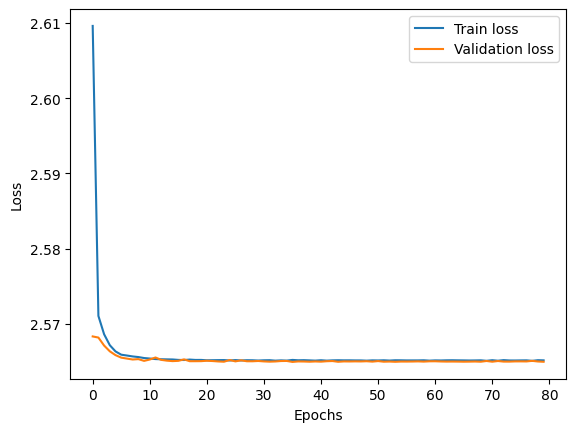

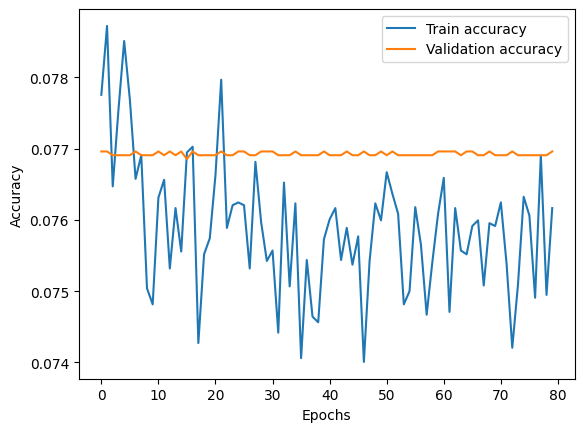

In [111]:
import matplotlib.pyplot as plt

plt.plot(model_fit.history['loss'], label='Train loss')
plt.plot(model_fit.history['val_loss'], label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train loss', 'Validation loss'])
plt.show()
plt.plot(model_fit.history['acc'], label='Train accuracy')
plt.plot(model_fit.history['val_acc'], label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train accuracy', 'Validation accuracy'])
plt.show()